# CO543 - Image Processing

## Lab 05 - Image Segmentation

1. Read the image texture.tif. Display the image. How many textures are there in the image? Describe them.

In [1]:
#importing libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

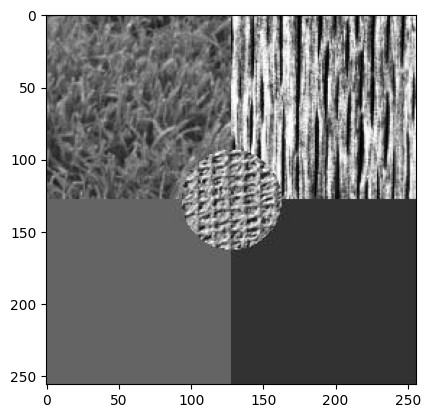

In [23]:
img = cv2.imread('texture.tif', 0)
plt.imshow(img, cmap='gray')
plt.show()

There are 5 different textures and two are plain colours.

Plain Color 1: The cluster with uniform grayscale intensity corresponding to a solid color.(Bottom Left)

Plain Color 2: The other cluster with a different uniform grayscale intensity.(Bottom Right)

Texture 3: The cluster with consistent patterns and minor variations in grayscale.(Top Left)

Texture 4: The cluster with a more complex pattern and significant grayscale variation.(Top Right)

Texture 5: The cluster with a unique and distinct pattern.(Middle)

2. Select several features and calculate them on blocks of size of 12 × 12 using Gabor filter. Display the calculated features and estimate which ones can be used to segment given structure.
For the selected images apply the K-means method and comment on the results.

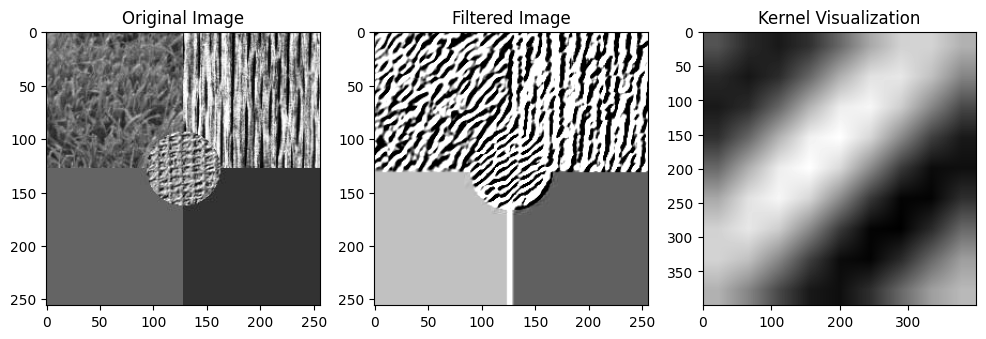

In [30]:
#defining parameters
ksize = 8
sigma = 5 
theta = 1*np.pi/4 
lamda = 1*np.pi/4
gamma=0.9 
phi = 0.8

#creating the kernal
kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F) 

#creating the image using the kernal
filter_img = cv2.filter2D(img, cv2.CV_8UC3, kernel)
kernel_resized = cv2.resize(kernel, (400, 400)) 

#plotting images
plt.figure(figsize=(12, 5))
plt.subplot(1,3,1), plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1,3,2), plt.imshow(filter_img, cmap='gray')
plt.title('Filtered Image')
plt.subplot(1,3,3), plt.imshow(kernel_resized, cmap='gray')
plt.title('Kernel Visualization')

plt.show()

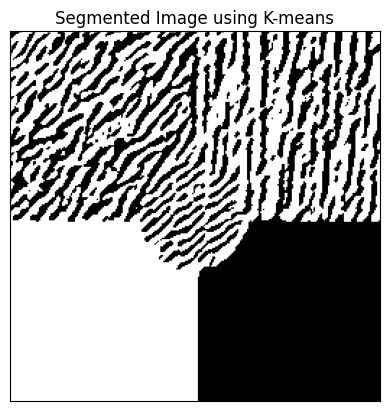

In [35]:
image_data = filter_img.reshape(-1, 1).astype(np.float32)

kmeans_criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, kmeans_labels, kmeans_centers = cv2.kmeans(image_data, 2, None, kmeans_criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

kmeans_centers = np.uint8(kmeans_centers)
segmented_result = kmeans_centers[kmeans_labels.flatten()]
segmented_result = segmented_result.reshape(filter_img.shape)

plt.imshow(segmented_result, cmap='gray')
plt.title('Segmented Image using K-means')
plt.xticks([]), plt.yticks([])
plt.show()


Text(0.5, 1.0, 'Segmented Energy using K-means')

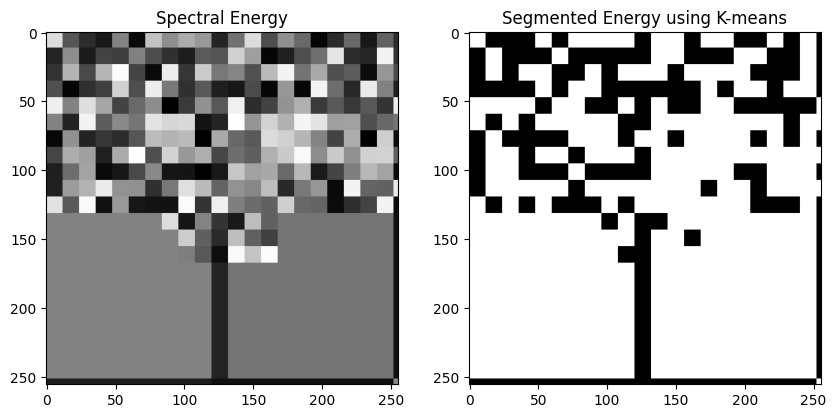

In [51]:
def spectral_energy(image, block_size):
    energy = np.zeros_like(image)
    for i in range(0, image.shape[0], block_size):
        for j in range(0, image.shape[1], block_size):
            block = image[i:i+block_size, j:j+block_size]
            f = np.fft.fft2(block)
            fshift = np.fft.fftshift(f)
            magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1e-10)
            energy[i:i+block_size, j:j+block_size] = np.sum(magnitude_spectrum)
    return energy

energy_image = spectral_energy(img, 12)

reshaped_image = np.float32(energy_image.reshape(-1, 1))
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(reshaped_image, 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
segmented_image = centers[labels.flatten()].reshape((energy_image.shape))

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1), plt.imshow(energy_image, cmap='gray')
plt.title('Spectral Energy')
plt.subplot(1,2,2), plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Energy using K-means')


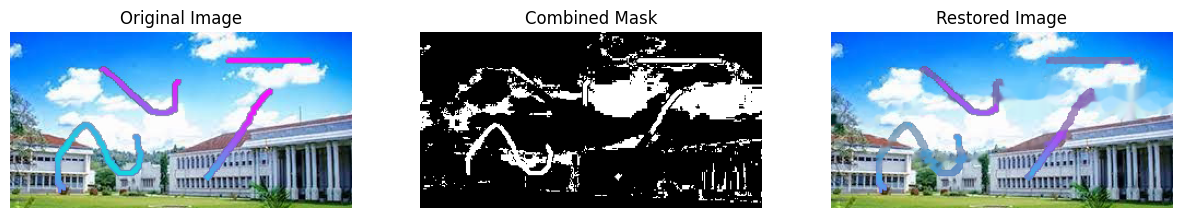

In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the damaged image
img = cv2.imread('Efac.jpg')

# Convert the image to the HSV color space
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the color ranges for the damaged areas (pink and cyan)
pink_lower = np.array([140, 50, 50])
pink_upper = np.array([180, 255, 255])

cyan_lower = np.array([80, 50, 50])
cyan_upper = np.array([100, 255, 255])

# Create masks for the damaged areas
mask_pink = cv2.inRange(hsv_img, pink_lower, pink_upper)
mask_cyan = cv2.inRange(hsv_img, cyan_lower, cyan_upper)

# Combine the masks
combined_mask = cv2.bitwise_or(mask_pink, mask_cyan)

# Inpaint the damaged image
restored_img = cv2.inpaint(img, combined_mask, 3, cv2.INPAINT_NS)

# Save the restored image
restored_img_path = "Efac_restored.jpg"
cv2.imwrite(restored_img_path, restored_img)

# Display the original image, the combined mask, and the restored image

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
restored_img = cv2.cvtColor(restored_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1), plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2), plt.imshow(combined_mask, cmap='gray')
plt.title('Combined Mask')
plt.axis('off')

plt.subplot(1,3,3), plt.imshow(restored_img, cmap='gray')
plt.title('Restored Image')
plt.axis('off')

plt.show()
